In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
import pycaret

In [238]:
#!pip show numpy

In [239]:
#import train and test data
train_hr=pd.read_csv("E://Analytics_Vidhya_Hackathon/HR_Analytics/train_hr.csv",sep=",")
test_hr=pd.read_csv("E://Analytics_Vidhya_Hackathon/HR_Analytics/test_hr.csv",sep=",")

In [240]:
#from pycaret.classification import *


In [241]:
#!pip install --upgrade numpy==1.16.1 --user

In [242]:
#df = setup(train_hr, target = 'is_promoted') #Setup dataset to check model performance using pycaret

In [243]:
#compare_models() #Check model performance using pycaret so we can choos best fit model accordingly.

In [244]:
train_hr.head() #Train data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [245]:
test_hr.head() #Test data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [246]:
train_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [247]:
train_hr.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [248]:
test_hr.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [249]:
train_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [250]:
train_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [251]:
train_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [252]:
train_hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# Check unique values for categorical data

In [253]:

print(train_hr.department.unique())


['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']


In [254]:
print(train_hr.region.unique())

['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


In [255]:
train_hr['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [256]:
train_hr.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [257]:
train_hr.age.unique() #Check the unique values for age

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

In [258]:
train_hr.length_of_service.unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [259]:
train_hr.avg_training_score.unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [260]:
train_hr.no_of_trainings.unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [261]:
train_hr.length_of_service.unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

# Check data with gropuby

In [262]:
train_hr[(train_hr['region']=='region_2')] #Check the details about region_2 because it's higly promoted region.

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
14,77040,R&D,region_2,Master's & above,m,sourcing,1,37,3.0,7,0,0,84,0
16,7152,Technology,region_2,Bachelor's,m,other,1,38,3.0,5,1,0,77,0
33,51756,Operations,region_2,Bachelor's,m,sourcing,2,57,4.0,6,0,0,58,0
41,40097,Operations,region_2,Bachelor's,f,other,2,23,4.0,2,1,0,57,0
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
44,61758,Analytics,region_2,Bachelor's,m,other,1,44,5.0,12,0,0,88,0
49,18013,Procurement,region_2,Master's & above,f,sourcing,1,56,3.0,12,0,0,73,0
50,24104,Finance,region_2,Bachelor's,m,sourcing,1,20,4.0,2,1,0,60,0


In [263]:
train_hr.groupby(['region'])['is_promoted'].count().sort_values(ascending=False) #Check promoted by region

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: is_promoted, dtype: int64

In [264]:
train_hr[(train_hr['previous_year_rating']>=5.0)] #Check the previous year rating 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
12,60051,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,49,5.0,5,1,0,49,0
18,17436,Sales & Marketing,region_31,Bachelor's,m,other,1,34,5.0,8,1,0,46,0
24,52057,Finance,region_22,Master's & above,m,sourcing,2,39,5.0,7,0,0,59,0
25,26585,Technology,region_22,Bachelor's,m,other,1,27,5.0,3,1,0,83,0
26,37749,Procurement,region_26,Bachelor's,m,other,1,31,5.0,4,1,0,68,0
28,8219,Analytics,region_5,Bachelor's,m,other,1,29,5.0,3,1,0,80,0


In [265]:
#Check promoted employee count previous_year_rating wise
train_hr.groupby(['previous_year_rating'])['is_promoted'].count().sort_values(ascending=False) 

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: is_promoted, dtype: int64

In [266]:
#Check promoted employee length of service wise
train_hr.groupby(['length_of_service'])['is_promoted'].count().sort_values(ascending=False) 

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: is_promoted, dtype: int64

# Working for missing data

In [267]:
numeric_data = train_hr.select_dtypes(include=[np.number])
categorical_data = train_hr.select_dtypes(exclude=[np.number])

In [268]:
numeric_data.shape

(54808, 9)

In [269]:
categorical_data.shape

(54808, 5)

In [270]:
#train_hr=train_hr.interpolate()
#train_hr['previous_year_rating'].fillna((train_hr['previous_year_rating'].mean()), inplace=True)

In [271]:
#Missing values replacement for categorical data
# for each column, get value counts in decreasing order and take the index (value) of most common class
df_most_common_imputed = categorical_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed.isnull().sum()


department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [272]:
#Replace missing values for numerical variable
numeric_data['previous_year_rating'].fillna((numeric_data['previous_year_rating'].mean()), inplace=True)
df_numeric_imputed=numeric_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [273]:
#Create new df as final_df
final_df=pd.concat([df_numeric_imputed,df_most_common_imputed],axis=1)

In [274]:
final_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,65141,1,30,5.0,4,0,0,60,0,Operations,region_22,Bachelor's,m,other
2,7513,1,34,3.0,7,0,0,50,0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2542,2,39,1.0,10,0,0,50,0,Sales & Marketing,region_23,Bachelor's,m,other
4,48945,1,45,3.0,2,0,0,73,0,Technology,region_26,Bachelor's,m,other


In [275]:
final_df.shape

(54808, 14)

In [276]:
final_df.isnull().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

# Outlier detection

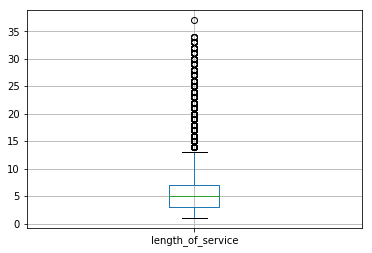

In [277]:
final_df.boxplot('length_of_service')

In [278]:
#Check promoted employee count greater than 13 years of experience
final_df[(final_df['length_of_service']>=13)&(final_df['is_promoted']==1)].count()

employee_id             288
no_of_trainings         288
age                     288
previous_year_rating    288
length_of_service       288
KPIs_met >80%           288
awards_won?             288
avg_training_score      288
is_promoted             288
department              288
region                  288
education               288
gender                  288
recruitment_channel     288
dtype: int64

In [279]:
##Check promoted employee count less than 13 years of experience
final_df[(final_df['length_of_service']<=13)&(final_df['is_promoted']==1)].count()

employee_id             4434
no_of_trainings         4434
age                     4434
previous_year_rating    4434
length_of_service       4434
KPIs_met >80%           4434
awards_won?             4434
avg_training_score      4434
is_promoted             4434
department              4434
region                  4434
education               4434
gender                  4434
recruitment_channel     4434
dtype: int64

In [280]:
Q1 = final_df['length_of_service'].quantile(0.25);Q1
Q3 = final_df['length_of_service'].quantile(0.75);Q3
IQR = Q3 - Q1    #IQR is interquartile range. 
Lower_q= (Q1 - 1.5 * IQR) 
Upper_q= (Q3 + 1.5 *IQR)

final_df['length_of_service'] = np.where(final_df['length_of_service'] >= Upper_q,Q3,final_df['length_of_service'])
final_df['length_of_service'] = np.where(final_df['length_of_service'] <= Lower_q,Q1,final_df['length_of_service'])

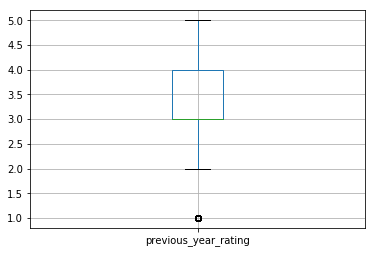

In [281]:
final_df.boxplot('previous_year_rating')

In [282]:
Q1 = final_df['previous_year_rating'].quantile(0.25);Q1
Q3 = final_df['previous_year_rating'].quantile(0.75);Q3
IQR = Q3 - Q1    #IQR is interquartile range. 
Lower_q= (Q1 - 1.5 * IQR) 
Upper_q= (Q3 + 1.5 *IQR)

final_df['previous_year_rating'] = np.where(final_df['previous_year_rating'] >= Upper_q,Q3,final_df['previous_year_rating'])
final_df['previous_year_rating'] = np.where(final_df['previous_year_rating'] <= Lower_q,Q1,final_df['previous_year_rating'])

# Feature Engineering

In [283]:
final_df['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

In [284]:
final_df['age_groups'] = pd.cut(x=final_df['age'], bins=[18,30,50,60,70])

In [285]:
final_df['length_of_service_group'] = pd.cut(x=final_df['length_of_service'], bins=[0,3,5,7,10,15])

In [286]:
final_df['avg_training_score_group']=pd.cut(x=final_df['avg_training_score'], bins=[20,40,60,80,100])

In [287]:
final_df.isna().sum()

employee_id                 0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
age_groups                  0
length_of_service_group     0
avg_training_score_group    0
dtype: int64

# Create new dataframe 

In [288]:
new_train=pd.DataFrame(final_df)

In [289]:
new_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel,age_groups,length_of_service_group,avg_training_score_group
0,65438,1,35,5.0,8.0,1,0,49,0,Sales & Marketing,region_7,Master's & above,f,sourcing,"(30, 50]","(7, 10]","(40, 60]"
1,65141,1,30,5.0,4.0,0,0,60,0,Operations,region_22,Bachelor's,m,other,"(18, 30]","(3, 5]","(40, 60]"
2,7513,1,34,3.0,7.0,0,0,50,0,Sales & Marketing,region_19,Bachelor's,m,sourcing,"(30, 50]","(5, 7]","(40, 60]"
3,2542,2,39,3.0,10.0,0,0,50,0,Sales & Marketing,region_23,Bachelor's,m,other,"(30, 50]","(7, 10]","(40, 60]"
4,48945,1,45,3.0,2.0,0,0,73,0,Technology,region_26,Bachelor's,m,other,"(30, 50]","(0, 3]","(60, 80]"


In [290]:
#Remove unnecessory & duplicate features
new_train.drop(['gender','recruitment_channel','age','length_of_service','avg_training_score'],axis=1,inplace=True)

In [291]:
new_train.shape

(54808, 12)

# Dummy variables

In [292]:
#Seperate target variable from dataset
y=new_train.pop('is_promoted') 

In [293]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
employee_id                 54808 non-null int64
no_of_trainings             54808 non-null int64
previous_year_rating        54808 non-null float64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
department                  54808 non-null object
region                      54808 non-null object
education                   54808 non-null object
age_groups                  54808 non-null category
length_of_service_group     54808 non-null category
avg_training_score_group    54808 non-null category
dtypes: category(3), float64(1), int64(4), object(3)
memory usage: 3.5+ MB


In [294]:
new_train=pd.get_dummies(new_train)

In [295]:
new_train.shape

(54808, 64)

In [296]:
#new_train store to X
X=new_train

In [297]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 64 columns):
employee_id                           54808 non-null int64
no_of_trainings                       54808 non-null int64
previous_year_rating                  54808 non-null float64
KPIs_met >80%                         54808 non-null int64
awards_won?                           54808 non-null int64
department_Analytics                  54808 non-null uint8
department_Finance                    54808 non-null uint8
department_HR                         54808 non-null uint8
department_Legal                      54808 non-null uint8
department_Operations                 54808 non-null uint8
department_Procurement                54808 non-null uint8
department_R&D                        54808 non-null uint8
department_Sales & Marketing          54808 non-null uint8
department_Technology                 54808 non-null uint8
region_region_1                       54808 non-null uint8
regi

# Train-Test split

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [299]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 64)
(16443, 64)
(38365,)
(16443,)


# Model building

# Logistic regression

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [301]:
classifier = LogisticRegression(random_state=0)

In [302]:
model=classifier.fit(X_train,y_train)

In [303]:
y_pred=model.predict(X_test)

In [304]:
cm=confusion_matrix(y_test,y_pred)

In [305]:
print(cm)

[[15057     0]
 [ 1386     0]]


In [306]:
model.score(X_train,y_train)

0.9144532777270951

# Random forest

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
rm_class=RandomForestClassifier(random_state=2,bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto')

In [309]:
rm_model=rm_class.fit(X_train,y_train)

In [310]:
rm_pred=rm_model.predict(X_test)

In [311]:
pd.crosstab(y_test,rm_pred,rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,14785,272
1,1033,353


In [312]:
(14785+353)/(14785+353+1033+272)

0.9206349206349206

# Data cleaning for Test data provided by hackathon

In [313]:
test_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [314]:
test_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [315]:
#Seperate continuous & ctegorial data
num_var = test_hr.select_dtypes(include=[np.number])
cat_var = test_hr.select_dtypes(exclude=[np.number])


In [316]:
num_var.shape

(23490, 8)

In [317]:
cat_var.shape

(23490, 5)

In [318]:
#Missing values replacement for categorical data
# for each column, get value counts in decreasing order and take the index (value) of most common class
test_cat = cat_var.apply(lambda x: x.fillna(x.value_counts().index[0]))
test_cat.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [319]:
#Replace missing values for numerical variable
num_var['previous_year_rating'].fillna((num_var['previous_year_rating'].mean()), inplace=True)
test_num=num_var

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [320]:
#Create new df as final_df
final_test=pd.concat([test_num,test_cat],axis=1)

In [321]:
final_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
0,8724,1,24,3.339146,1,1,0,77,Technology,region_26,Bachelor's,m,sourcing
1,74430,1,31,3.000000,5,0,0,51,HR,region_4,Bachelor's,f,other
2,72255,1,31,1.000000,4,0,0,47,Sales & Marketing,region_13,Bachelor's,m,other
3,38562,3,31,2.000000,9,0,0,65,Procurement,region_2,Bachelor's,f,other
4,64486,1,30,4.000000,7,0,0,61,Finance,region_29,Bachelor's,m,sourcing


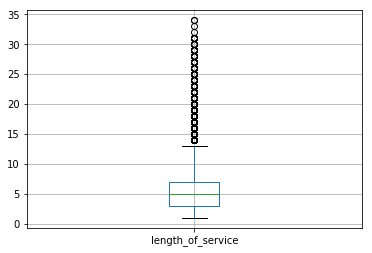

In [322]:
final_test.boxplot('length_of_service')

In [323]:
Q1 = final_test['length_of_service'].quantile(0.25);Q1
Q3 = final_test['length_of_service'].quantile(0.75);Q3
IQR = Q3 - Q1    #IQR is interquartile range. 
Lower_q= (Q1 - 1.5 * IQR) 
Upper_q= (Q3 + 1.5 *IQR)

final_test['length_of_service'] = np.where(final_test['length_of_service'] >= Upper_q,Q3,final_test['length_of_service'])
final_test['length_of_service'] = np.where(final_test['length_of_service'] <= Lower_q,Q1,final_test['length_of_service'])


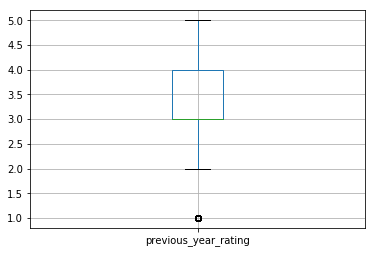

In [324]:
final_test.boxplot('previous_year_rating')

In [325]:
Q1 = final_test['previous_year_rating'].quantile(0.25);Q1
Q3 = final_test['previous_year_rating'].quantile(0.75);Q3
IQR = Q3 - Q1    #IQR is interquartile range. 
Lower_q= (Q1 - 1.5 * IQR) 
Upper_q= (Q3 + 1.5 *IQR)

final_test['previous_year_rating'] = np.where(final_test['previous_year_rating'] >= Upper_q,Q3,final_test['previous_year_rating'])
final_test['previous_year_rating'] = np.where(final_test['previous_year_rating'] <= Lower_q,Q1,final_test['previous_year_rating'])

In [326]:
final_test['age_groups'] = pd.cut(x=final_test['age'], bins=[18,30,50,60,70])
final_test['length_of_service_group'] = pd.cut(x=final_test['length_of_service'], bins=[0,3,5,7,10,15])
final_test['avg_training_score_group']=pd.cut(x=final_test['avg_training_score'], bins=[20,40,60,80,100])

In [327]:
final_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel,age_groups,length_of_service_group,avg_training_score_group
0,8724,1,24,3.339146,1.0,1,0,77,Technology,region_26,Bachelor's,m,sourcing,"(18, 30]","(0, 3]","(60, 80]"
1,74430,1,31,3.000000,5.0,0,0,51,HR,region_4,Bachelor's,f,other,"(30, 50]","(3, 5]","(40, 60]"
2,72255,1,31,3.000000,4.0,0,0,47,Sales & Marketing,region_13,Bachelor's,m,other,"(30, 50]","(3, 5]","(40, 60]"
3,38562,3,31,2.000000,9.0,0,0,65,Procurement,region_2,Bachelor's,f,other,"(30, 50]","(7, 10]","(60, 80]"
4,64486,1,30,4.000000,7.0,0,0,61,Finance,region_29,Bachelor's,m,sourcing,"(18, 30]","(5, 7]","(60, 80]"


In [328]:
#New cleaned test dataframe
new_test=pd.DataFrame(final_test)
new_test.drop(['gender','recruitment_channel','age','length_of_service','avg_training_score'],axis=1,inplace=True)

In [329]:
new_test.head()

,employee_id,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,department,region,education,age_groups,length_of_service_group,avg_training_score_group
0,8724,1,3.339146,1,0,Technology,region_26,Bachelor's,"(18, 30]","(0, 3]","(60, 80]"
1,74430,1,3.000000,0,0,HR,region_4,Bachelor's,"(30, 50]","(3, 5]","(40, 60]"
2,72255,1,3.000000,0,0,Sales & Marketing,region_13,Bachelor's,"(30, 50]","(3, 5]","(40, 60]"
3,38562,3,2.000000,0,0,Procurement,region_2,Bachelor's,"(30, 50]","(7, 10]","(60, 80]"
4,64486,1,4.000000,0,0,Finance,region_29,Bachelor's,"(18, 30]","(5, 7]","(60, 80]"


In [330]:
#Dummy variables for test data
new_test=pd.get_dummies(new_test)

In [331]:
new_test.shape

(23490, 64)

# Model testing with test data

In [335]:
y_pred=model.predict(new_test)

In [337]:
#cm=confusion_matrix(y_test,y_pred)

In [ ]:
model.score(X_train,y_train)